In [28]:
!wget https://i.ibb.co/mXSYmyT/histeq.png

--2021-08-11 04:41:48--  https://i.ibb.co/mXSYmyT/histeq.png
Resolving i.ibb.co (i.ibb.co)... 104.194.8.196, 172.96.140.18
Connecting to i.ibb.co (i.ibb.co)|104.194.8.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324183 (317K) [image/png]
Saving to: ‘histeq.png’

histeq.png          100%[===================>] 316.58K   539KB/s    in 0.6s    

2021-08-11 04:41:50 (539 KB/s) - ‘histeq.png’ saved [324183/324183]



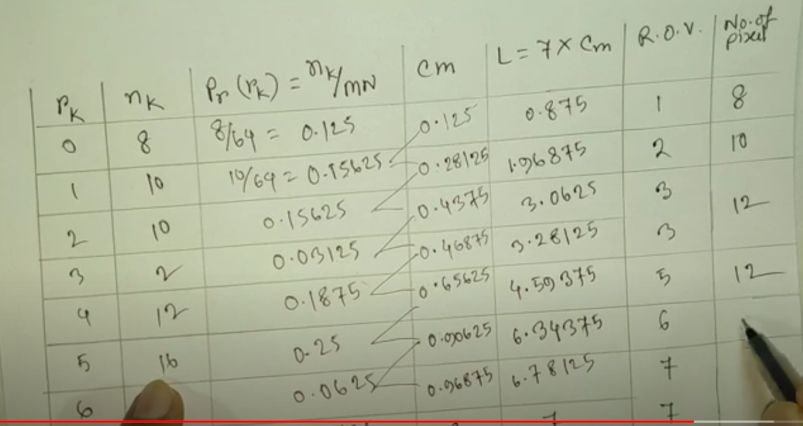

In [30]:
import cv2
img = cv2.imread("/content/histeq.png") 
from google.colab.patches import cv2_imshow
cv2_imshow(img)

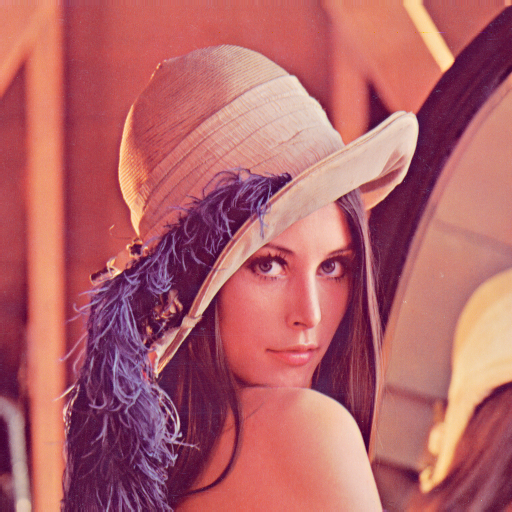

In [31]:
img = cv2.imread("/content/Lenna_(test_image).png") 
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [32]:
b = img[:,:,0]

b.shape

(512, 512)

True


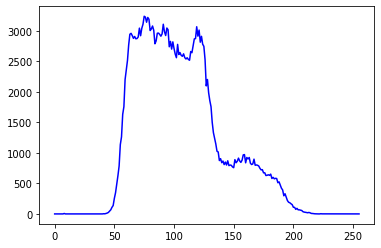

In [33]:
hist = []
for i in range (256):
    hist.append(0)

for i in range (b.shape[0]):
    for j in range (b.shape[1]):
        hist[b[i][j]] += 1

print(np.sum(hist) == 512*512)

import matplotlib.pyplot as plt
plt.plot([i for i in range(256)], hist, color='blue')
plt.show()

In [36]:
probabilities = []
for i in range(256): probabilities.append(hist[i]/(b.shape[0]*b.shape[1]))
print(probabilities)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6702880859375e-05, 0.0, 0.0, 0.0, 3.814697265625e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1444091796875e-05, 7.62939453125e-06, 2.6702880859375e-05, 5.340576171875e-05, 9.1552734375e-05, 0.00017547607421875, 0.000255584716796875, 0.0004119873046875, 0.000522613525390625, 0.00096893310546875, 0.001323699951171875, 0.001842498779296875, 0.00238800048828125, 0.002994537353515625, 0.004329681396484375, 0.00481414794921875, 0.006221771240234375, 0.0066986083984375, 0.008396148681640625, 0.008983612060546875, 0.00959014892578125, 0.010555267333984375, 0.011226654052734375, 0.01128387451171875, 0.011142730712890625, 0.0109710693359375, 0.011089324951171875, 0.010944366455078125, 0.010959625244140625, 0.011058807373046875, 0.011608123779296875, 0.011135101318359375, 0.011600494384765625, 0.011852264404296875, 0.01235198974609375, 0.012298583984375

In [37]:
cum_probabilities = []
for i in range(256): cum_probabilities.append(0.00)

cum_probabilities[0] = probabilities[0]
for i in range(1, 256):
    cum_probabilities[i] = cum_probabilities[i-1]+probabilities[i]

In [42]:
L = []
for i in range(256): L.append(0)

for i in range(256):
    L[i] = 255*cum_probabilities[i]

In [43]:
ROV = []
for i in range(256): ROV.append(0)

for i in range(256):
    ROV[i] = np.round(255*cum_probabilities[i])

In [44]:
final_image = b

for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        final_image[i][j] = ROV[b[i][j]]

original image        histogram equalised image  


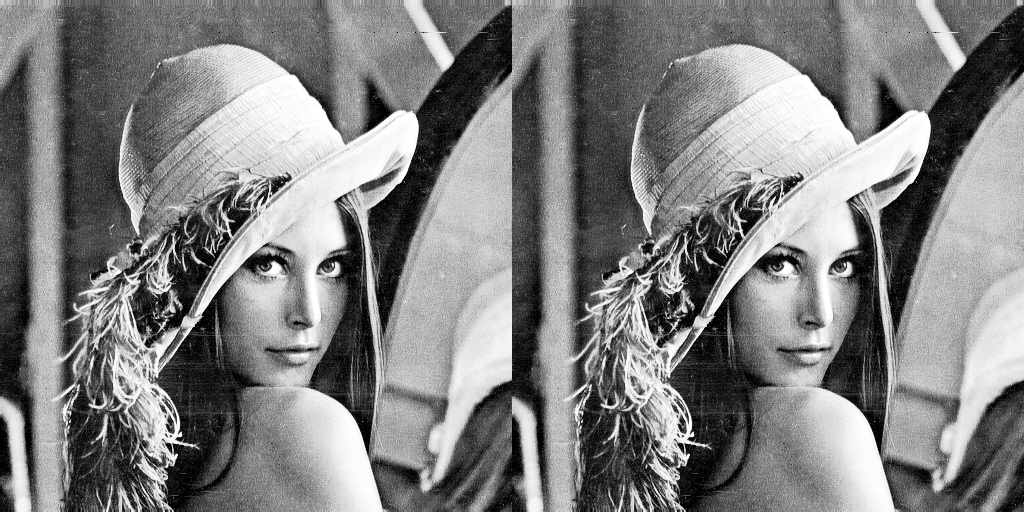

In [45]:
print("original image        histogram equalised image  ")
image_stacked = np.hstack((b, final_image))
cv2_imshow(image_stacked)